In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

import os
os.chdir("C:\\Computer_Vision")

import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
Active_customers = pd.read_excel("segmentt.xlsx" , sheet_name = "new"  )

print("imported successfully")

imported successfully


In [3]:
Churned_customers = pd.read_excel("segmentt.xlsx" , sheet_name = "past"  )

print("imported successfully")

imported successfully


In [4]:
print("The shape of the Active_Customers : " , Active_customers.shape)

The shape of the Active_Customers :  (9999, 29)


In [5]:
print("The shape of the Churned_Customers : " , Churned_customers.shape)

The shape of the Churned_Customers :  (10000, 30)


In [6]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

In [7]:
Active_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SITE_ACCOUNT_NUMBER        9998 non-null   object        
 1   ACCOUNT_STATUS             9998 non-null   object        
 2   FIRST_COMMUNICATION_DATE   9989 non-null   datetime64[ns]
 3   UPGRADE_DATE               9989 non-null   datetime64[ns]
 4   SERVICE_ PLAN              8760 non-null   object        
 5   MODEL                      9323 non-null   object        
 6   SALES_CHANNEL              7093 non-null   object        
 7   DIRECT_INDIRECT_CHANNEL    9954 non-null   object        
 8   SALES_SOURCE               9306 non-null   object        
 9   COMPANY_SOURCE_NAME        9988 non-null   object        
 10  FIRST_NAME                 9998 non-null   object        
 11  LAST_NAME                  9998 non-null   object        
 12  ADDRES

In [8]:
Churned_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   SITE_ACCOUNT_NUMBER        10000 non-null  object        
 1   ACCOUNT_STATUS             9985 non-null   object        
 2   FIRST_COMMUNICATION_DATE   10000 non-null  datetime64[ns]
 3   CHURN_DATE                 10000 non-null  datetime64[ns]
 4   UPGRADE_DATE               9121 non-null   datetime64[ns]
 5   SERVICE_PLAN               8518 non-null   object        
 6   MODEL                      9290 non-null   object        
 7   SALES_CHANNEL              7398 non-null   object        
 8   DIRECT_INDIRECT_CHANNEL    9216 non-null   object        
 9   SALES_SOURCE               9710 non-null   object        
 10  COMPANY_SOURCE_NAME        9992 non-null   object        
 11  FIRST_NAME                 9974 non-null   object        
 12  LAST_

# Visualizing Missing Values

In [9]:
Active_customers.isnull().sum()[Active_customers.isnull().sum()!=0]

SITE_ACCOUNT_NUMBER             1
ACCOUNT_STATUS                  1
FIRST_COMMUNICATION_DATE       10
UPGRADE_DATE                   10
SERVICE_ PLAN                1239
MODEL                         676
SALES_CHANNEL                2906
DIRECT_INDIRECT_CHANNEL        45
SALES_SOURCE                  693
COMPANY_SOURCE_NAME            11
FIRST_NAME                      1
LAST_NAME                       1
ADDRESS                        54
CITY                            1
STATE                          22
ZIPCODE                        22
EMAIL_ADDRESS                  20
FEEDBACK                     1914
SATELLITE                     396
SITE_TYPE_DESC                 11
WARRANTY_NAME                 957
MOST_RECENT_SALES_CHANNEL       7
GENDER                       1271
DATE_OF_BIRTH                   1
AGE                             1
INCOME                        318
MARITAL_STATUS                319
PRESENCE_OF_CHILDREN         1315
COMPUTER_OWNER               3055
dtype: int64

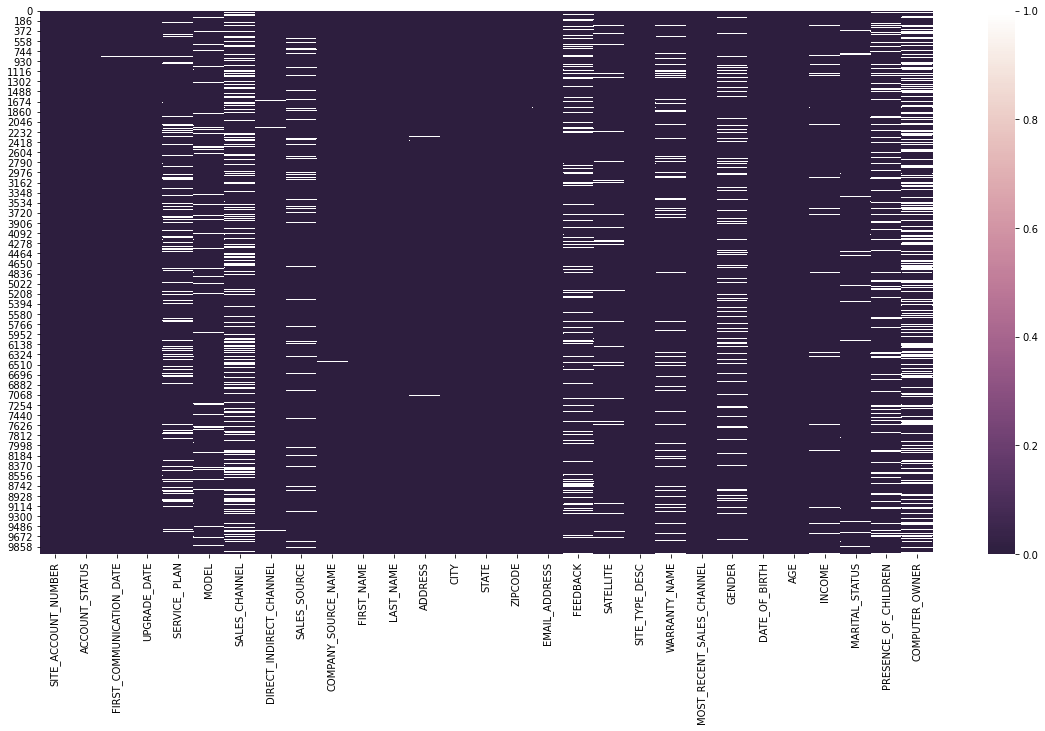

In [10]:
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(Active_customers.isnull(), cmap=cmap)

In [11]:
Churned_customers.isnull().sum()[Churned_customers.isnull().sum()!=0]

ACCOUNT_STATUS                 15
UPGRADE_DATE                  879
SERVICE_PLAN                 1482
MODEL                         710
SALES_CHANNEL                2602
DIRECT_INDIRECT_CHANNEL       784
SALES_SOURCE                  290
COMPANY_SOURCE_NAME             8
FIRST_NAME                     26
LAST_NAME                       7
ADDRESS                         9
STATE                          45
ZIPCODE                        45
EMAIL_ADDRESS                  20
FEEDBACK                     2028
SATELLITE                    1013
SITE_TYPE_DESC                 63
WARRANTY_NAME                 681
MOST_RECENT_SALES_CHANNEL      21
GENDER                       1238
DATE_OF_BIRTH                   8
AGE                             8
MARITAL_STATUS                281
PRESENCE_OF_CHILDREN         1252
COMPUTER_OWNER               3243
dtype: int64

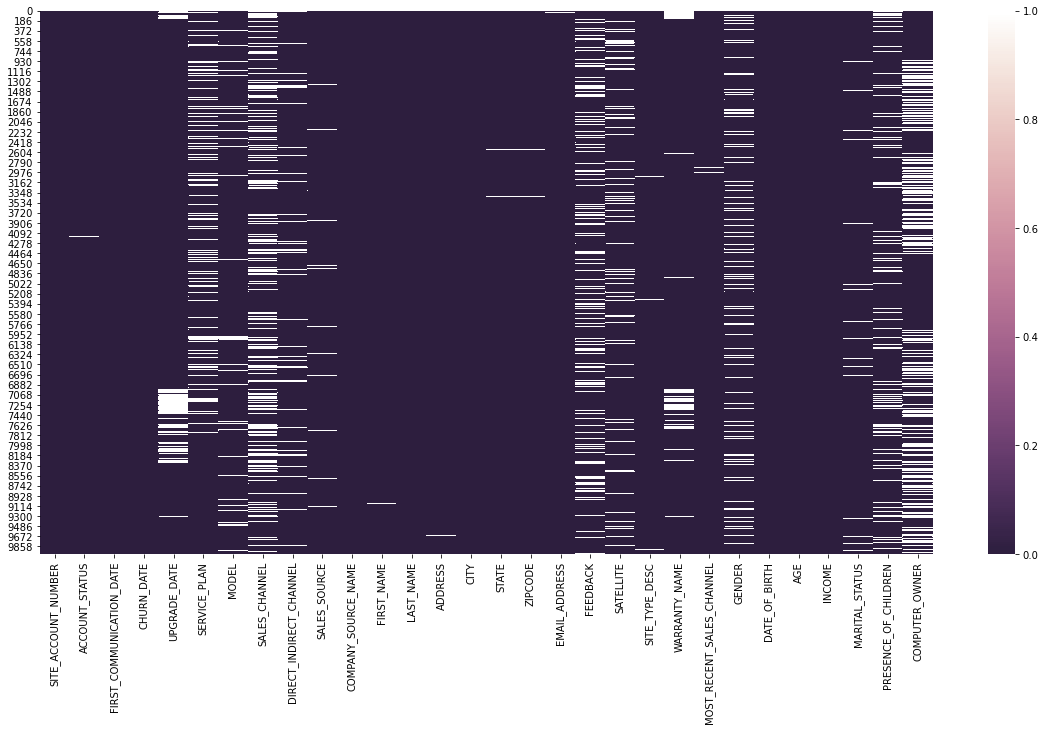

In [12]:
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(Churned_customers.isnull(), cmap=cmap)

In [13]:
obj_cols = Active_customers.select_dtypes("object")

In [14]:
num_cols = Active_customers.select_dtypes(["int64","float64"])

# Categorical Data

In [15]:
for i in obj_cols.columns :
    
    print("Total Unique Elements in ", i, " : ", Active_customers[i].nunique())
    print("Total Value Count in ", i, " : ", Active_customers[i].value_counts())

Total Unique Elements in  SITE_ACCOUNT_NUMBER  :  9998
Total Value Count in  SITE_ACCOUNT_NUMBER  :  AMR-36775936    1
AMR-46224598    1
AMR-41849328    1
AMR-19131477    1
AMR-18211320    1
               ..
AMR-15937509    1
AMR-23049880    1
AMR-48460765    1
AMR-48787640    1
AMR-29740346    1
Name: SITE_ACCOUNT_NUMBER, Length: 9998, dtype: int64
Total Unique Elements in  ACCOUNT_STATUS  :  2
Total Value Count in  ACCOUNT_STATUS  :  Active      9985
Inactive      13
Name: ACCOUNT_STATUS, dtype: int64
Total Unique Elements in  SERVICE_ PLAN  :  7
Total Value Count in  SERVICE_ PLAN  :  Proplus      1272
Basic_Ltd    1268
Basic        1263
Elite        1256
Power150     1248
Home         1243
Pro          1210
Name: SERVICE_ PLAN, dtype: int64
Total Unique Elements in  MODEL  :  7
Total Value Count in  MODEL  :  HN7000S    4296
HN9000     1985
UNK         977
DW4020      655
DW4000      645
DW6000      514
DW7000      251
Name: MODEL, dtype: int64
Total Unique Elements in  SALES_CHAN

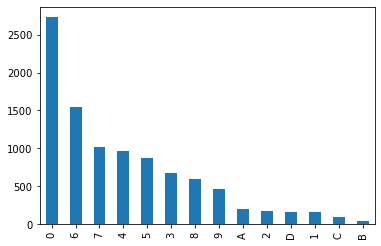

In [16]:
Active_customers.INCOME.value_counts().plot(kind="bar")  # Income is categorised between Income Ranges

In [17]:
Active_customers.CITY.nunique() #Too much Names, Too costly to process and keep

828

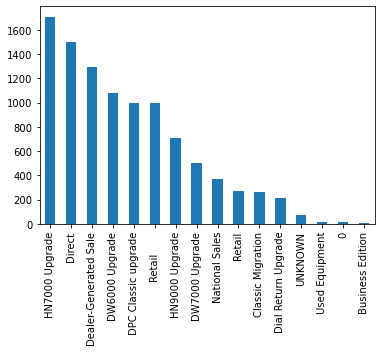

In [18]:
Active_customers.MOST_RECENT_SALES_CHANNEL.value_counts().plot(kind="bar")

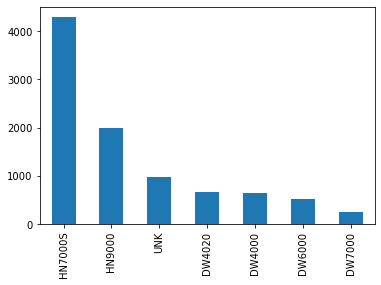

In [19]:
Active_customers.MODEL.value_counts().plot(kind="bar")

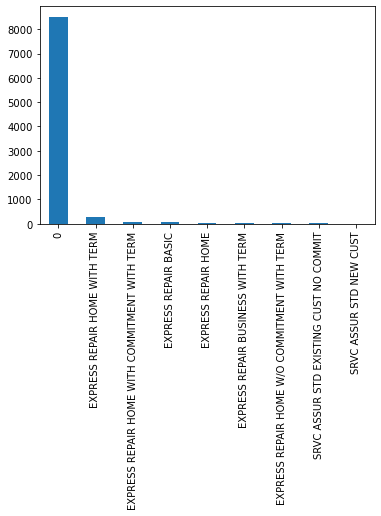

In [20]:
Active_customers.WARRANTY_NAME.value_counts().plot(kind="bar") # This 0 is suspicious here, am gonna take it as unknown

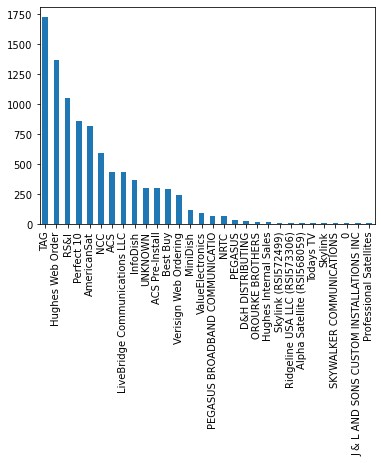

In [21]:
Active_customers.SALES_SOURCE.value_counts().plot(kind="bar")

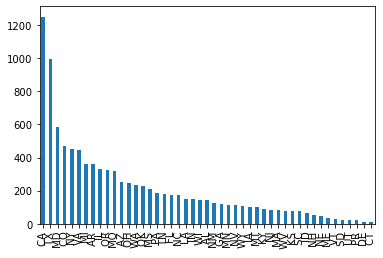

In [22]:
Active_customers.STATE.value_counts().plot(kind="bar") #Total 47 states, where CA is at top followed by Texas and MD.

# Feature Engineering

In [23]:
#Keeping only rows where Account Status is Active
Active_customers = Active_customers [Active_customers.ACCOUNT_STATUS == "Active"]

In [24]:
Active_customers["Active_Duration"] = Active_customers.UPGRADE_DATE - Active_customers.FIRST_COMMUNICATION_DATE

In [25]:
def Duration_handler(df,col):
    Duration = [ ]
    for i in df[col] :
        if(str(i)=="NaT"):
            Duration.append(np.datetime64('NaT'))
        else:
            temp = str(i)
            p = temp.split(" " ,1)
            p = p[0]
            Duration.append(p)
    return(Duration)

In [26]:
Active_customers["Duration" ] = Duration_handler(Active_customers,"Active_Duration")

In [27]:
Active_customers.Duration.fillna("0",inplace=True)

In [28]:
Active_customers.Duration = Active_customers.Duration.astype("int")

In [29]:
Active_customers["Duration" ].describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count    9985.000000
mean      995.676815
std       288.324560
min         0.000000
1%        510.000000
5%        550.000000
10%       603.000000
25%       751.000000
50%       992.000000
75%      1241.000000
90%      1398.000000
95%      1451.000000
99%      1490.000000
max      1500.000000
Name: Duration, dtype: float64

In [30]:
Active_customers.Duration.replace(0,Active_customers.Duration.mean(),inplace=True)

In [31]:
len(Active_customers[Active_customers["Duration" ]>1490])

90

In [32]:
Active_customers.INCOME.isnull().sum()

314

In [33]:
lizzt = []
for i in Active_customers['INCOME']:
    temp=str(i)
    if(temp=="nan"):
        temp = np.nan
    elif temp == "A":
        temp=11
    elif temp == "B":
        temp=12
    elif temp == "C":
        temp=13
    elif temp == "D":
        temp=14
    else:
        temp=i
    lizzt.append(temp)

In [34]:
Active_customers["Income"] = lizzt

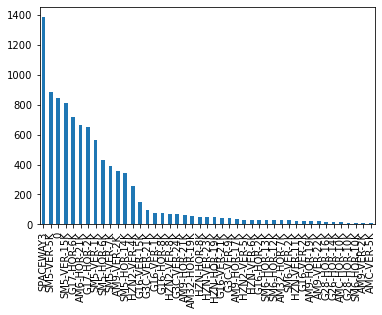

In [35]:
Active_customers['SATELLITE'].value_counts().plot(kind="bar") #0 seems confusing here, am considering it as Unknown.

In [36]:
Active_customers['SATELLITE'].replace(0,"Unknown-",inplace=True) #considering 0 as Unknown.

In [37]:
Active_customers['SATELLITE'].isnull().sum() #Since Satellite do have Missing Values, 

395

In [38]:
def Satellite(df,col):
    Satellite = [ ]
    for i in df[col]:
        temp = str(i)
    
        if(temp=="nan"):
            Satellite.append(np.nan)
        else:
            p = temp.split("-",1)
            Satellite.append(p[0])
    return(Satellite)

In [39]:
Active_customers['Satellite'] = Satellite(Active_customers,"SATELLITE")

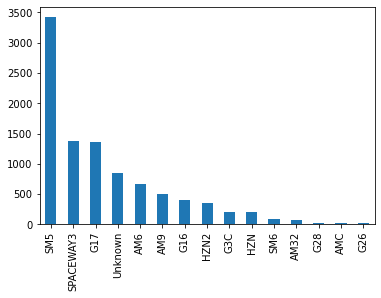

In [40]:
Active_customers['Satellite'].value_counts().plot(kind="bar") #0 seems confusing here, am considering it as Unknown.

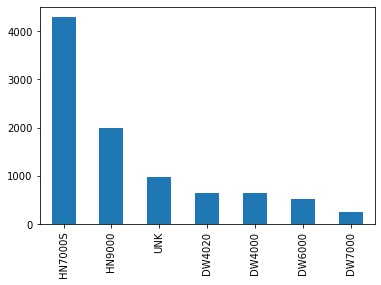

In [41]:
Active_customers.MODEL.value_counts().plot(kind="bar")

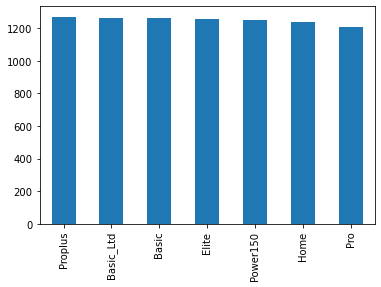

In [42]:
Active_customers['SERVICE_ PLAN'].value_counts().plot(kind="bar")

In [43]:
Active_customers['SERVICE_ PLAN'].isnull().sum()

1237

In [44]:
Active_customers['SERVICE_ PLAN'].fillna( "Unknown" , inplace = True)

In [45]:
Active_customers.CITY.nunique()

828

In [46]:
Active_customers.ZIPCODE.nunique()  #The Value seems to be suspicious. Not considering

896

In [47]:
Active_customers.dtypes

SITE_ACCOUNT_NUMBER                   object
ACCOUNT_STATUS                        object
FIRST_COMMUNICATION_DATE      datetime64[ns]
UPGRADE_DATE                  datetime64[ns]
SERVICE_ PLAN                         object
MODEL                                 object
SALES_CHANNEL                         object
DIRECT_INDIRECT_CHANNEL               object
SALES_SOURCE                          object
COMPANY_SOURCE_NAME                   object
FIRST_NAME                            object
LAST_NAME                             object
ADDRESS                               object
CITY                                  object
STATE                                 object
ZIPCODE                               object
EMAIL_ADDRESS                         object
FEEDBACK                              object
SATELLITE                             object
SITE_TYPE_DESC                        object
WARRANTY_NAME                         object
MOST_RECENT_SALES_CHANNEL             object
GENDER    

In [48]:
Active_customers.AGE.replace(".",np.nan , inplace=True)

In [49]:
Active_df = Active_customers.drop(['SITE_ACCOUNT_NUMBER', 'ACCOUNT_STATUS', 'FIRST_COMMUNICATION_DATE', 'UPGRADE_DATE',
                                    'SALES_SOURCE', 'COMPANY_SOURCE_NAME','FIRST_NAME', 'LAST_NAME', 'ADDRESS', 'CITY', 
                                    "STATE",  'EMAIL_ADDRESS','SATELLITE', 'DATE_OF_BIRTH','INCOME','Active_Duration'] , axis=1)

In [50]:
Active_df.isnull().sum()[Active_df.isnull().sum()!=0]

MODEL                         675
SALES_CHANNEL                2903
DIRECT_INDIRECT_CHANNEL        44
ZIPCODE                        21
FEEDBACK                     1911
SITE_TYPE_DESC                 10
WARRANTY_NAME                 943
MOST_RECENT_SALES_CHANNEL       6
GENDER                       1270
AGE                           351
MARITAL_STATUS                318
PRESENCE_OF_CHILDREN         1310
COMPUTER_OWNER               3051
Income                        314
Satellite                     395
dtype: int64

# Missing Values Treatment

In [51]:
Active_df['MODEL'].fillna(str(Active_df['MODEL'].mode()[0]) , inplace=True)

Active_df['SALES_CHANNEL'].fillna(str(Active_df['SALES_CHANNEL'].mode()[0]) , inplace=True)

Active_df['DIRECT_INDIRECT_CHANNEL'].fillna(str(Active_df['DIRECT_INDIRECT_CHANNEL'].mode()[0]) , inplace=True)

Active_df['SITE_TYPE_DESC'].fillna(str(Active_df['SITE_TYPE_DESC'].mode()[0]) , inplace=True)

Active_df['MOST_RECENT_SALES_CHANNEL'].fillna(str(Active_df['MOST_RECENT_SALES_CHANNEL'].mode()[0]) , inplace=True)

Active_df['GENDER'].fillna(str(Active_df['GENDER'].mode()[0]) , inplace=True)

Active_df['MARITAL_STATUS'].fillna(str(Active_df['MARITAL_STATUS'].mode()[0]) , inplace=True)

Active_df['PRESENCE_OF_CHILDREN'].fillna(str(Active_df['PRESENCE_OF_CHILDREN'].mode()[0]) , inplace=True)


In [52]:
Active_df['SERVICE_ PLAN'].fillna(str(Active_df['SERVICE_ PLAN'].mode()[0]) , inplace=True)

Active_df['FEEDBACK'].fillna(str(Active_df['FEEDBACK'].mode()[0]) , inplace=True)

Active_df['WARRANTY_NAME'].fillna(str(Active_df['WARRANTY_NAME'].mode()[0]) , inplace=True)

Active_df['COMPUTER_OWNER'].fillna(str(Active_df['COMPUTER_OWNER'].mode()[0]) , inplace=True)

Active_df['Duration'].fillna(str(Active_df['Duration'].mode()[0]) , inplace=True)

Active_df['Satellite'].fillna(str(Active_df['Satellite'].mode()[0]) , inplace=True)

Active_df['Income'].fillna(str(Active_df['Income'].mode()[0]) , inplace=True)

In [53]:
Active_df.AGE.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.90,0.95,0.99])

count    9634.000000
mean       43.912601
std        13.730233
min        22.000000
1%         22.000000
5%         23.000000
10%        26.000000
25%        32.000000
50%        44.000000
75%        55.000000
90%        63.000000
95%        66.000000
99%        74.000000
max        92.000000
Name: AGE, dtype: float64

In [54]:
Active_df.AGE.replace(".",np.nan,inplace=True)

In [55]:
Active_df.AGE.isnull().sum()

351

In [56]:
len( Active_df [Active_df.AGE>80] )

7

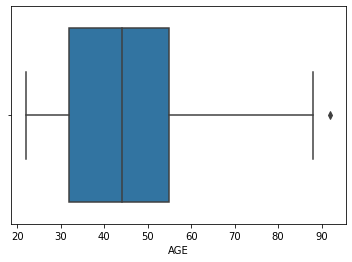

In [57]:
sns.boxplot(Active_df.AGE)

In [58]:
#Seems Better now with No outliers, now we can directly put mean.
Active_df['AGE'].fillna(int(Active_df['AGE'].mean()) , inplace=True)

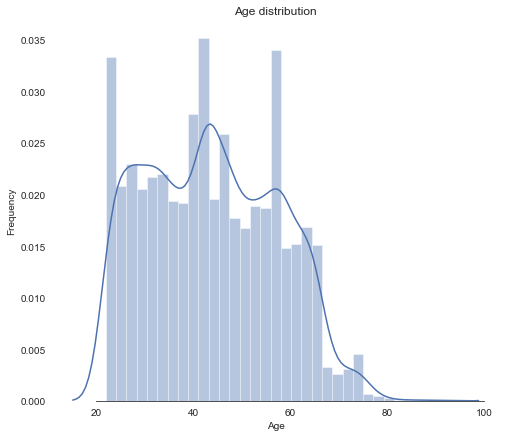

In [59]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(Active_df['AGE'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Age")
ax.set(title="Age distribution")
sns.despine(trim=True, left=True)
plt.show()

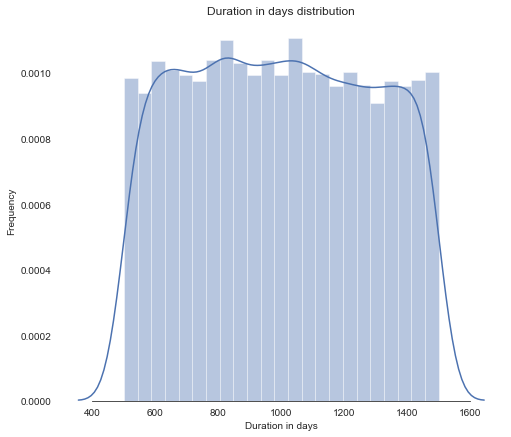

In [60]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))
#Check the new distribution 
sns.distplot(Active_df['Duration'], color="b");
ax.xaxis.grid(False)
ax.set(ylabel="Frequency")
ax.set(xlabel="Duration in days")
ax.set(title="Duration in days distribution")
sns.despine(trim=True, left=True)
plt.show()

In [61]:
Active_df.dtypes

SERVICE_ PLAN                 object
MODEL                         object
SALES_CHANNEL                 object
DIRECT_INDIRECT_CHANNEL       object
ZIPCODE                       object
FEEDBACK                      object
SITE_TYPE_DESC                object
WARRANTY_NAME                 object
MOST_RECENT_SALES_CHANNEL     object
GENDER                        object
AGE                          float64
MARITAL_STATUS                object
PRESENCE_OF_CHILDREN          object
COMPUTER_OWNER                object
Duration                     float64
Income                        object
Satellite                     object
dtype: object

In [62]:
for i in Active_df.columns :
    
    print("Total Unique Elements in ", i, " : ", Active_df[i].nunique())
    print("Total Value Count in ", i, " : ", Active_df[i].value_counts())

Total Unique Elements in  SERVICE_ PLAN  :  8
Total Value Count in  SERVICE_ PLAN  :  Proplus      1271
Basic_Ltd    1265
Basic        1260
Elite        1254
Power150     1248
Home         1240
Unknown      1237
Pro          1210
Name: SERVICE_ PLAN, dtype: int64
Total Unique Elements in  MODEL  :  7
Total Value Count in  MODEL  :  HN7000S    4967
HN9000     1984
UNK         977
DW4020      648
DW4000      645
DW6000      514
DW7000      250
Name: MODEL, dtype: int64
Total Unique Elements in  SALES_CHANNEL  :  5
Total Value Count in  SALES_CHANNEL  :  Sales Agents     4355
Retail/others    1439
Vars             1421
Web orders       1389
Call Center      1381
Name: SALES_CHANNEL, dtype: int64
Total Unique Elements in  DIRECT_INDIRECT_CHANNEL  :  3
Total Value Count in  DIRECT_INDIRECT_CHANNEL  :  Indirect    7660
Direct      2316
0              9
Name: DIRECT_INDIRECT_CHANNEL, dtype: int64
Total Unique Elements in  ZIPCODE  :  896
Total Value Count in  ZIPCODE  :           67
93561    

In [63]:
Active_df.WARRANTY_NAME.replace(0,"Unkown_warranty",inplace=True)

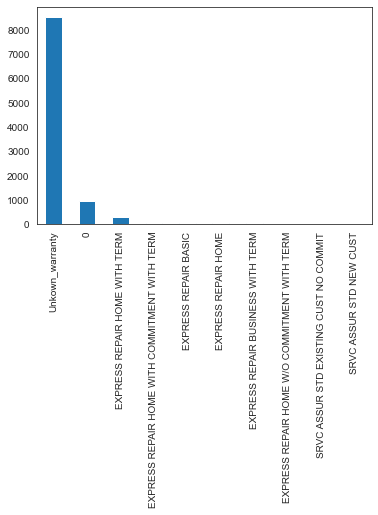

In [64]:
Active_df.WARRANTY_NAME.value_counts().plot(kind="bar")

In [65]:
Active_df.MOST_RECENT_SALES_CHANNEL.replace(0,"UNKNOWN",inplace=True)

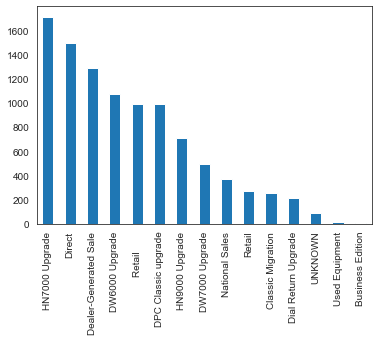

In [66]:
Active_df.MOST_RECENT_SALES_CHANNEL.value_counts().plot(kind="bar")

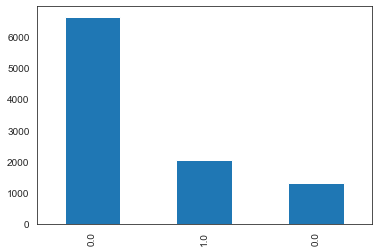

In [67]:
Active_df.PRESENCE_OF_CHILDREN.value_counts().plot(kind="bar")

In [68]:
Active_df.ZIPCODE.isnull().sum()

21

In [69]:
Active_df.ZIPCODE.replace(" ",np.nan,inplace=True)

In [70]:
Active_df.ZIPCODE.isnull().sum()

88

In [71]:
Zip = [ ]

for i in Active_df.ZIPCODE:
    if(str(i)=="nan"):
       
        Zip.append(np.nan)
    else:
        temp = str(i)
        p = temp.split(".")
        p = p[0]
        q = list(map( int , p))
        q = q[0]
        
        Zip.append(q)

In [72]:
Active_df [ "Zip" ] = Zip

In [73]:
Active_df.Zip.fillna(0 , inplace = True)

In [74]:
Active_df.Zip.isnull().sum()

0

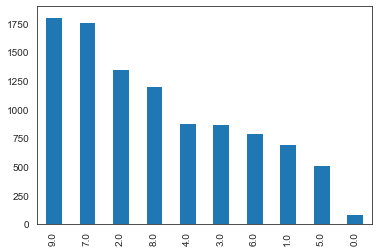

In [75]:
Active_df.Zip.value_counts().plot(kind="bar")

In [76]:
plt.rcParams["figure.figsize"] = (10,10)

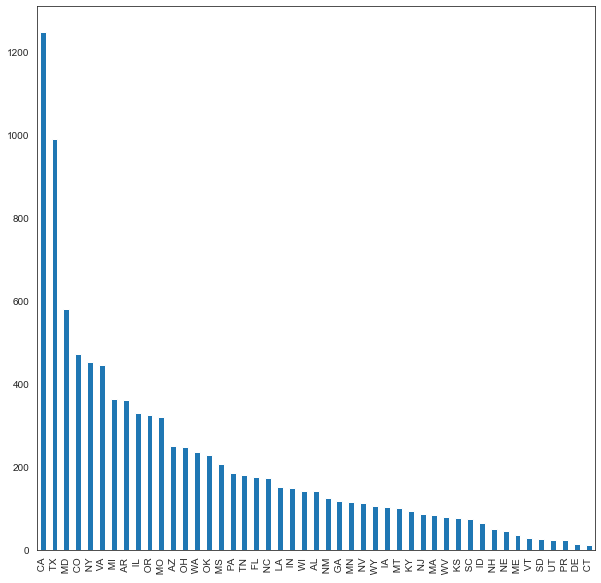

In [77]:
Active_customers.STATE.value_counts().plot(kind="bar")

In [78]:
Active_df.drop(["ZIPCODE"],inplace=True,axis=1)

In [79]:
Active_df = Active_df.astype({ "Zip": "int" , 'GENDER': 'float', 'MARITAL_STATUS': 'float' , "PRESENCE_OF_CHILDREN" : "float", 
                             "Duration" : "float" , "Income" : "float" , "MARITAL_STATUS" : "float"} )

In [80]:
cleanup_nums =  {"DIRECT_INDIRECT_CHANNEL":     {"Indirect" : 0, "Direct" : 1} ,"FEEDBACK" : { "BAD" : 0, "GOOD" : 1} 
                 , "COMPUTER_OWNER" : {"N" : 0 , "Y" : 1 } , "GENDER" : {1.0 : 1 , 2.0 : 0 } ,
                "SITE_TYPE_DESC":     {"Broadband Remote" : 0, "Spaceway" : 1}}
          

In [81]:
Active_df.replace(cleanup_nums,inplace=True)

In [82]:
Active_df.dtypes

SERVICE_ PLAN                 object
MODEL                         object
SALES_CHANNEL                 object
DIRECT_INDIRECT_CHANNEL        int64
FEEDBACK                       int64
SITE_TYPE_DESC                 int64
WARRANTY_NAME                 object
MOST_RECENT_SALES_CHANNEL     object
GENDER                       float64
AGE                          float64
MARITAL_STATUS               float64
PRESENCE_OF_CHILDREN         float64
COMPUTER_OWNER                 int64
Duration                     float64
Income                       float64
Satellite                     object
Zip                            int32
dtype: object

In [83]:
Active_df = Active_df.astype({ "Income": "int64" , 'Duration': 'int64', 'MARITAL_STATUS': 'int64' , "PRESENCE_OF_CHILDREN" : "int64", 
                             "AGE" : "int64" , "GENDER" : "int64" } )

In [84]:
Active_df

SERVICE_ PLAN    MODEL  SALES_CHANNEL  DIRECT_INDIRECT_CHANNEL  FEEDBACK  \
0          Unknown   HN9000           Vars                        0         1   
1              Pro  HN7000S   Sales Agents                        0         1   
2         Power150   HN9000    Call Center                        0         0   
3         Power150   DW6000   Sales Agents                        1         1   
4             Home  HN7000S    Call Center                        0         1   
...            ...      ...            ...                      ...       ...   
9993     Basic_Ltd  HN7000S   Sales Agents                        0         1   
9994          Home   DW4000     Web orders                        0         1   
9995         Elite  HN7000S  Retail/others                        1         1   
9996           Pro   HN9000  Retail/others                        0         0   
9997          Home   DW4020           Vars                        0         1   

      SITE_TYPE_DESC    WARRANTY_NAME MOST_RECENT_SALES_CHANNEL  GENDER  AGE  \
0                  0  Unkown_warranty            HN7000 Upgrade       0   69   
1                  1  Unkown_warranty             Retail              0   43   
2                  0  Unkown_warranty            National Sales       0   58   
3                  1  Unkown_warranty                    Direct       1   22   
4                  0  Unkown_warranty            DW6000 Upgrade       1   36   
...              ...              ...                       ...     ...  ...   
9993               0  Unkown_warranty            DW7000 Upgrade       1   32   
9994               1  Unkown_warranty         Classic Migration       1   39   
9995               0                0            HN7000 Upgrade       1   43   
9996               0  Unkown_warranty     Dealer-Generated Sale       0   33   
9997               0  Unkown_warranty     Dealer-Generated Sale       1   65   

      MARITAL_STATUS  PRESENCE_OF_CHILDREN  COMPUTER_OWNER  Duration  Income  \
0                  1                     0               0       747       0   
1                  1                     0               0      1194       4   
2                  1                     0               0      1144       4   
3                  1                     1               0      1223       6   
4                  0                     0               0       838       7   
...              ...                   ...             ...       ...     ...   
9993               0                     0               0      1119       4   
9994               0                     0               0      1150       4   
9995               0                     0               0      1461       0   
9996               1                     0               0       602       5   
9997               1                     1               0       758       0   

      Satellite  Zip  
0     SPACEWAY3    2  
1          HZN2    8  
2           SM5    7  
3     SPACEWAY3    4  
4       Unknown    1  
...         ...  ...  
9993        G3C    3  
9994        G17    9  
9995       HZN2    1  
9996        SM5    2  
9997        G16    9  

[9985 rows x 17 columns]

In [86]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://d33wubrfki0l68.cloudfront.net/979d9b9012d8bbb1e4f14b85fd7b0dc5f961feaa/109d1/img/docs/zip-code-map.png")

# ZIP Codes Beginning With                        States
                   0                        Connecticut, Massachusetts, Maine, New Hampshire, New Jersey, Puerto Rico, 
                                            Rhode Island, Vermont, Virgin Islands, Army Post Office Europe, 
                                            Fleet Post Office Europe
                   
                   1	                    Delaware, New York, Pennsylvania
                   
                   2	                    District of Columbia, Maryland, North Carolina, South Carolina, 
                                            Virginia, West Virginia
                   
                   3	                    Alabama, Florida, Georgia, Mississippi, Tennessee, 
                                            Army Post Office Americas, Fleet Post Office Americas
                   
                   4	                    Indiana, Kentucky, Michigan, Ohio
                   
                   5	                    Iowa, Minnesota, Montana, North Dakota, South Dakota, Wisconsin
                   
                   6	                    Illinois, Kansas, Missouri, Nebraska
                   
                   7	                    Arkansas, Louisiana, Oklahoma, Texas
                   
                   8	                    Arizona, Colorado, Idaho, New Mexico, Nevada, Utah, Wyoming
                   
                   9	                    Alaska, American Samoa, California, Guam, Hawaii, Marshall Islands, 
                                            Federated States of Micronesia, Northern Mariana Islands, Oregon, Palau,
                                            Washington, Army Post Office Pacific, Fleet Post Office Pacific

In [87]:
Active_df.drop(['WARRANTY_NAME'],inplace=True,axis=1)

In [88]:
Active = pd.get_dummies(data = Active_df, columns = ["SERVICE_ PLAN" , "MODEL" ,"SALES_CHANNEL" , "Zip" ,
                                                       "MOST_RECENT_SALES_CHANNEL" , "Satellite" , "MARITAL_STATUS"
                                                       ])

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Scaler = StandardScaler()

Active[["AGE","Duration","Income"]] = Scaler.fit_transform(Active[["AGE","Duration","Income"]].values)

In [90]:
Active

DIRECT_INDIRECT_CHANNEL  FEEDBACK  SITE_TYPE_DESC  GENDER       AGE  \
0                           0         1               0       0  1.862483   
1                           0         1               1       0 -0.065286   
2                           0         0               0       0  1.046888   
3                           1         1               1       1 -1.622330   
4                           0         1               0       1 -0.584301   
...                       ...       ...             ...     ...       ...   
9993                        0         1               0       1 -0.880881   
9994                        0         1               1       1 -0.361866   
9995                        1         1               0       1 -0.065286   
9996                        0         0               0       0 -0.806736   
9997                        0         1               0       1  1.565903   

      PRESENCE_OF_CHILDREN  COMPUTER_OWNER  Duration    Income  \
0                        0               0 -0.870338 -1.196007   
1                        0               0  0.688485 -0.062359   
2                        0               0  0.514120 -0.062359   
3                        1               0  0.789616  0.504465   
4                        0               0 -0.552994  0.787877   
...                    ...             ...       ...       ...   
9993                     0               0  0.426937 -0.062359   
9994                     0               0  0.535044 -0.062359   
9995                     0               0  1.619594 -1.196007   
9996                     0               0 -1.375996  0.221053   
9997                     1               0 -0.831978 -1.196007   

      SERVICE_ PLAN_Basic  SERVICE_ PLAN_Basic_Ltd  SERVICE_ PLAN_Elite  \
0                       0                        0                    0   
1                       0                        0                    0   
2                       0                        0                    0   
3                       0                        0                    0   
4                       0                        0                    0   
...                   ...                      ...                  ...   
9993                    0                        1                    0   
9994                    0                        0                    0   
9995                    0                        0                    1   
9996                    0                        0                    0   
9997                    0                        0                    0   

      SERVICE_ PLAN_Home  SERVICE_ PLAN_Power150  SERVICE_ PLAN_Pro  \
0                      0                       0                  0   
1                      0                       0                  1   
2                      0                       1                  0   
3                      0                       1                  0   
4                      1                       0                  0   
...                  ...                     ...                ...   
9993                   0                       0                  0   
9994                   1                       0                  0   
9995                   0                       0                  0   
9996                   0                       0                  1   
9997                   1                       0                  0   

      SERVICE_ PLAN_Proplus  SERVICE_ PLAN_Unknown  MODEL_DW4000  \
0                         0                      1             0   
1                         0                      0             0   
2                         0                      0             0   
3                         0                      0             0   
4                         0                      0             0   
...                     ...                    ...           ...   
9993                      0                      0        

In [91]:
pc = PCA()

principalComponents = pc.fit_transform(Active)
principalComponents = pd.DataFrame(principalComponents)
principalComponents.columns = Active.columns

In [92]:
variance = np.cumsum (np.round(pc.explained_variance_ratio_, decimals=4)*100)

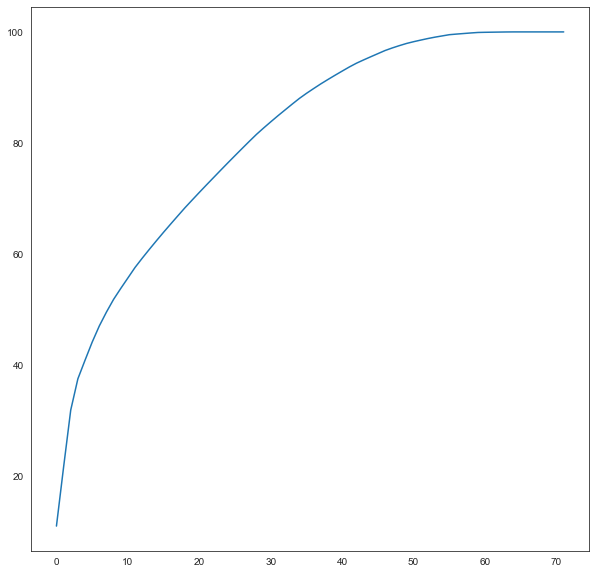

In [93]:
plt.plot(variance)

In [94]:
PC = PCA(n_components=45)

principalComponents_ = PC.fit_transform(Active)
principalComponents_ = pd.DataFrame(principalComponents_)

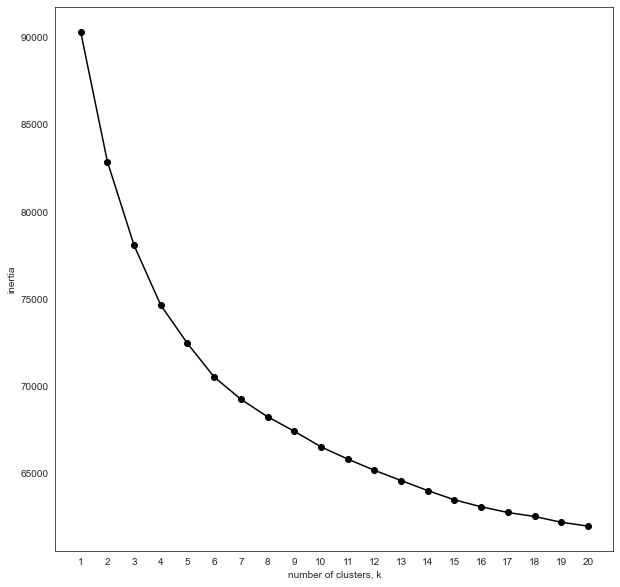

In [95]:
ks = range(1, 21)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(principalComponents_)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [96]:
from sklearn.cluster import KMeans

In [97]:
KMeans_Telco = KMeans( n_clusters=4 , init = "k-means++" , random_state = 42 )

In [98]:
KMeans_Telco.fit(principalComponents_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [99]:
principalComponents_['cluster'] = KMeans_Telco.labels_

In [100]:
Active_customers['cluster'] = KMeans_Telco.labels_

In [101]:
principalComponents_['cluster'].value_counts()

3    2716
0    2550
2    2431
1    2288
Name: cluster, dtype: int64

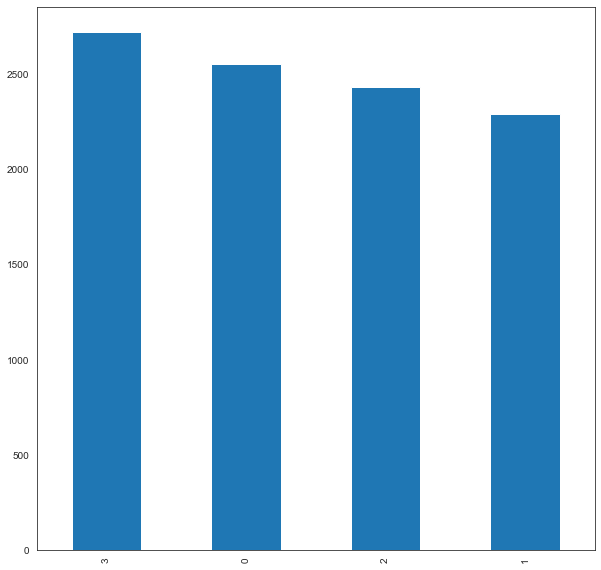

In [102]:
principalComponents_['cluster'].value_counts().plot(kind="bar")

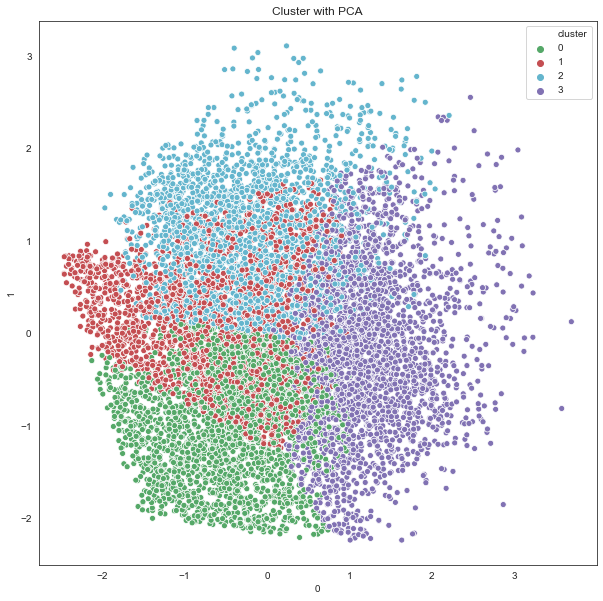

In [103]:
x_axis = principalComponents_[0]
y_axis = principalComponents_[1]
sns.scatterplot(x = x_axis,y = y_axis , hue = principalComponents_['cluster'],palette=["g","r","c","m"])
plt.title("Cluster with PCA")
plt.show()

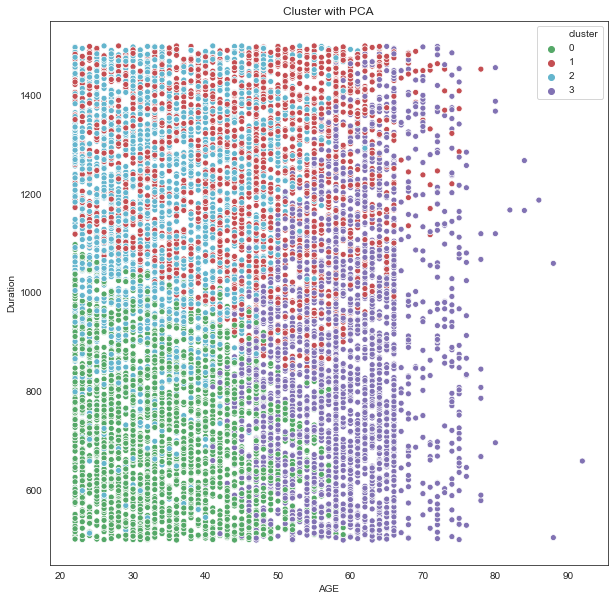

In [104]:
sns.scatterplot(x = Active_customers.AGE,y = Active_customers.Duration , hue = Active_customers.cluster,palette=["g","r","c","m"])
plt.title("Cluster with PCA")
plt.show()

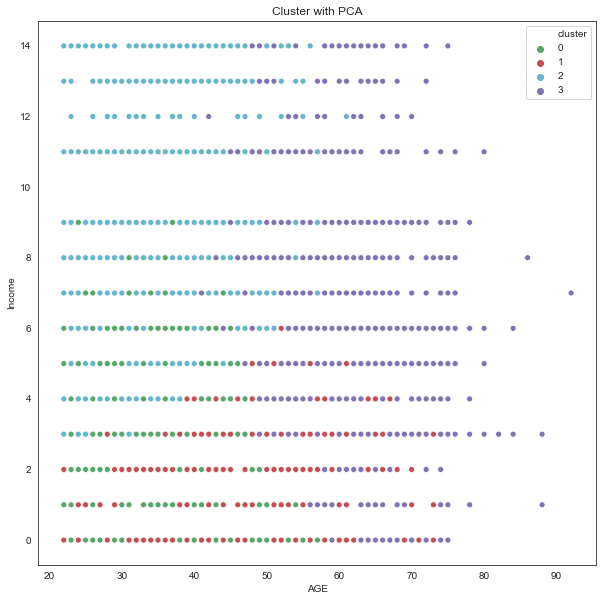

In [105]:
sns.scatterplot(x = Active_customers.AGE,y = Active_customers.Income , hue = Active_customers.cluster,palette=["g","r","c","m"])
plt.title("Cluster with PCA")
plt.show()

In [106]:
def prepare_pca(n_components, data, kmeans_labels):
    names = ['x', 'y', 'z']
    matrix = PCA(n_components=n_components).fit_transform(data)
    df_matrix = pd.DataFrame(matrix)
    df_matrix.rename({i:names[i] for i in range(n_components)}, axis=1, inplace=True)
    df_matrix['labels'] = kmeans_labels
    
    return df_matrix

def plot_3d(df, name='labels'):
    iris = px.data.iris()
    fig = px.scatter_3d(df, x='x', y='y', z='z',
                  color=name, opacity=0.5)
    

    fig.update_traces(marker=dict(size=3))
    fig.show()

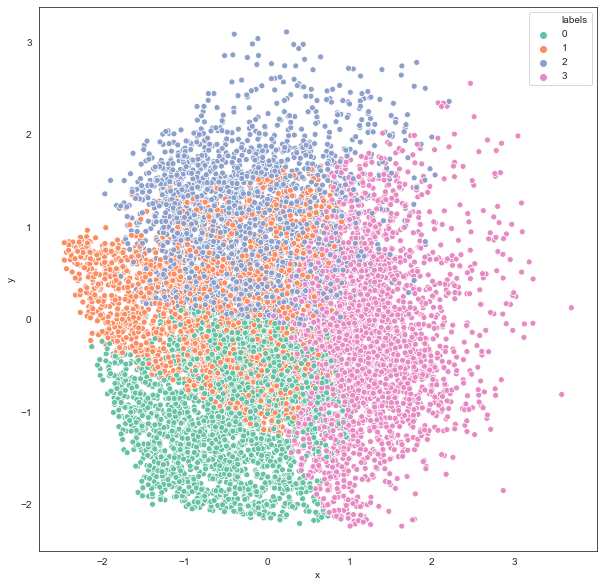

In [107]:
plot = prepare_pca (3, Active, KMeans_Telco.labels_)

sns.scatterplot( x = plot.x , y = plot.y , hue=plot.labels, palette="Set2")

In [108]:
plot_3d(plot)

In [117]:
Active_customers.groupby(['cluster'])['Income'].mean()

cluster
0    2.772089
1    1.067966
2    7.349650
3    5.640752
Name: Income, dtype: float64

In [118]:
Active_customers.groupby(['cluster'])['AGE'].mean()

cluster
0    34.958333
1    45.157619
2    35.065235
3    58.773968
Name: AGE, dtype: float64

In [119]:
Active_customers.groupby(['cluster'])['Duration'].mean()

cluster
0     723.524314
1    1246.884037
2    1169.351042
3     887.424164
Name: Duration, dtype: float64

In [120]:
Active_customers.groupby(['cluster'])['GENDER'].value_counts()

cluster  GENDER
0        1.0       1202
         2.0       1014
1        1.0       1128
         2.0        870
2        1.0       1171
         2.0        960
3        1.0       1256
         2.0       1114
Name: GENDER, dtype: int64

In [121]:
pivot = Active_customers.groupby(['SERVICE_ PLAN', 'MODEL', 'SALES_CHANNEL', 'DIRECT_INDIRECT_CHANNEL',
       'FEEDBACK', 'SITE_TYPE_DESC', 'MOST_RECENT_SALES_CHANNEL', 'GENDER',
       'MARITAL_STATUS', 'PRESENCE_OF_CHILDREN', 'COMPUTER_OWNER',
       'Income', 'Satellite',  'cluster']).size().reset_index(name='Count')

In [122]:
plt.rcParams["figure.figsize"] = (6,7)

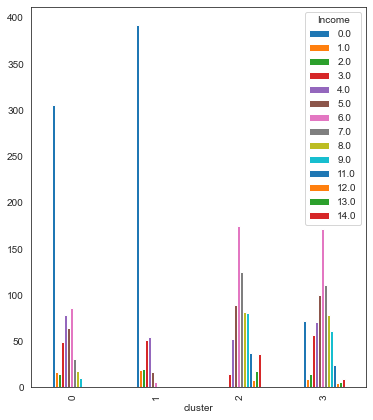

In [123]:
f1 = pd.pivot_table(pivot,  values='Count',  columns=['Income'],  index = "cluster", aggfunc=np.sum)
f1.plot(kind="bar")
plt.show()

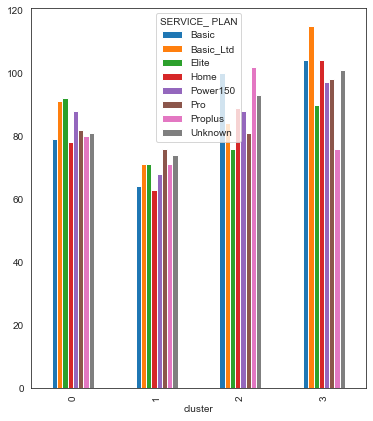

In [124]:
f2 = pd.pivot_table(pivot,  values='Count',  columns=['SERVICE_ PLAN'],  index = "cluster", aggfunc=np.sum)
f2.plot(kind="bar")
plt.show()

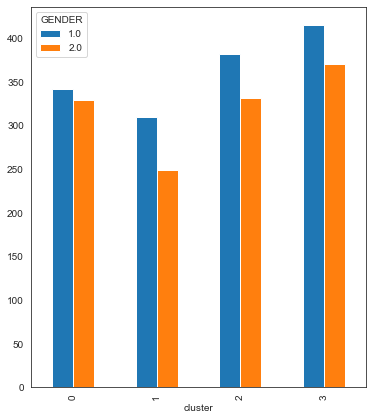

In [125]:
f3 = pd.pivot_table(pivot,  values='Count',  columns=['GENDER'],  index = "cluster", aggfunc=np.sum)
f3.plot(kind="bar")
plt.show()

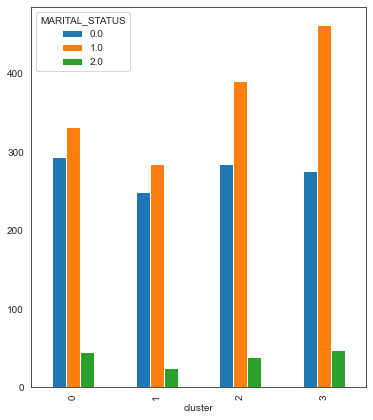

In [126]:
f4 = pd.pivot_table(pivot,  values='Count',  columns=['MARITAL_STATUS'],  index = "cluster", aggfunc=np.sum)
f4.plot(kind="bar")
plt.show()

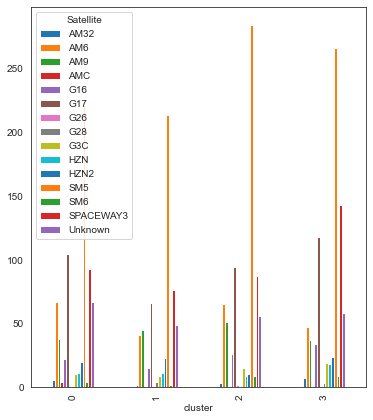

In [127]:
f5 = pd.pivot_table(pivot,  values='Count',  columns=['Satellite'],  index = "cluster", aggfunc=np.sum)
f5.plot(kind="bar")
plt.show()

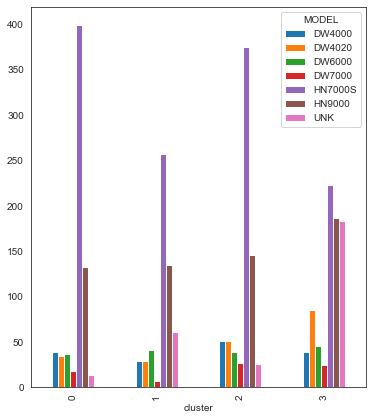

In [128]:
f5 = pd.pivot_table(pivot,  values='Count',  columns=['MODEL'],  index = "cluster", aggfunc=np.sum)
f5.plot(kind="bar")
plt.show()

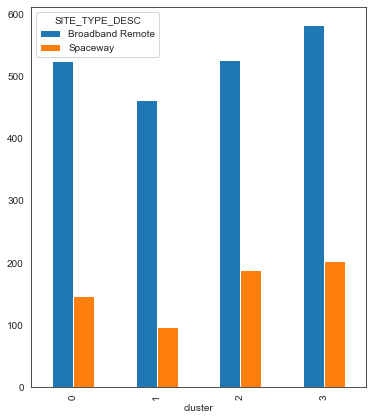

In [129]:
f6 = pd.pivot_table(pivot,  values='Count',  columns=['SITE_TYPE_DESC'],  index = "cluster", aggfunc=np.sum)
f6.plot(kind="bar")
plt.show()

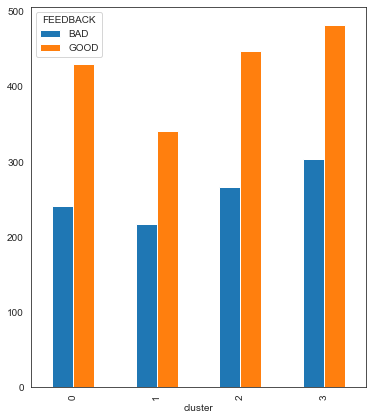

In [130]:
f7 = pd.pivot_table(pivot,  values='Count',  columns=['FEEDBACK'],  index = "cluster", aggfunc=np.sum)
f7.plot(kind="bar")
plt.show()

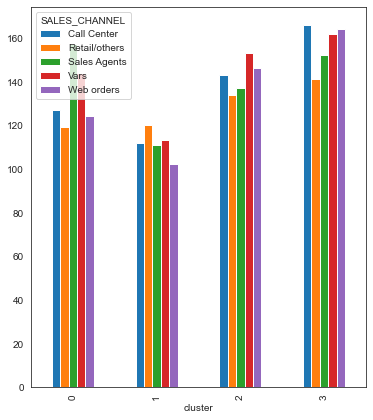

In [131]:
f8 = pd.pivot_table(pivot,  values='Count',  columns=['SALES_CHANNEL'],  index = "cluster", aggfunc=np.sum)
f8.plot(kind="bar")
plt.show()

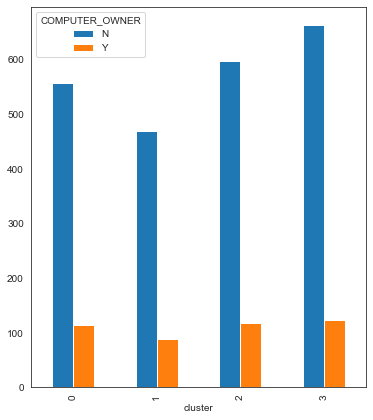

In [132]:
f9 = pd.pivot_table(pivot,  values='Count',  columns=['COMPUTER_OWNER'],  index = "cluster", aggfunc=np.sum)
f9.plot(kind="bar")
plt.show()

In [133]:
fig = px.parallel_coordinates(Active_customers, color = "cluster",
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

# DATA QUALITY ASSESMENT 

## POINTS:

##### INCOMPLETNESS
* Many missing values are present in dataset . 
* However there are number of ways to mitigate this issue like some statistical imputations may be needed for further work

#### INACCURACY 
* Features namely Warranty_Name and Sales_Channel have unwanted script instead of proper data . 
It contains unexplained 0's and also "." , etc. values

#### INCONSISTENCY
* Many features like Service_Plan and Model shows inconsistency
* But an effective Feature Engineering can help us to reduce it.

#### REUNDANCY
* Account Status, Service_Plan column have redundancies like "Inactive" for "Closed" , and "Professional Plus as ProPlus" etc.  .

#### NON-STANDARD
* In many rows data given is in non-standard format
* Feature namely First_communication_Date,Upgrade_Date and Churn_Date is available in datetime format instead of just date. 


# CONCLUSION:

#### FROM ABOVE POINT WE CAN SAY THAT DATA HAVE POOR QUALITY AND NEEDS EXTENSIVE AND DETAILED PRE-PROCESSING STRATEGY FOR FURTHER USE.